In this example, I downloaded Microsoft Excel documents containing information regarding the football history of the Miami Dolphins and the University of Miami (FL). Data comes from sports-reference.com.

Links to Data:
Miami Dolphins Page:https://www.pro-football-reference.com/teams/mia/index.htm
Miami Hurricanes Page:https://www.sports-reference.com/cfb/schools/miami-fl/


<IPython.core.display.Javascript object>


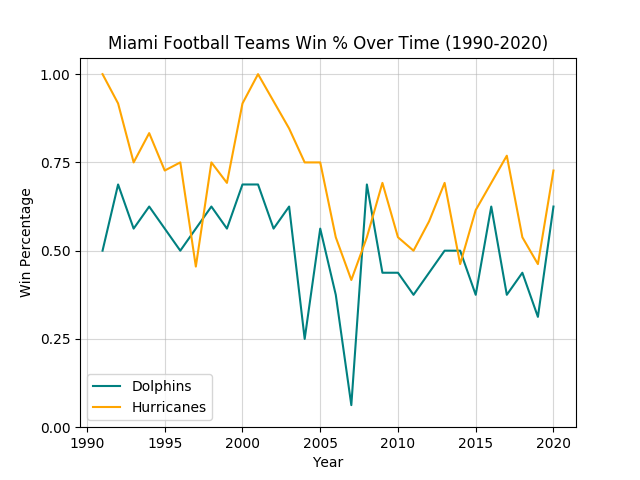

There is a correlation of: win%    0.557042
dtype: float64


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

#Loading Data
phins = pd.read_excel('dolphins.xlsx', header=1)
canes = pd.read_excel('Hurricanes.xlsx', header =1)


#Cleaning the data and calculating win %
dolphins = pd.DataFrame(phins).reset_index()
dolphins["Year"] = pd.to_numeric(dolphins['Year'])
dolphins = dolphins[(dolphins['Year'] > 1990) & (dolphins['Year'] < 2021)]
dolphins['win%'] = (dolphins['W'] / (dolphins['W'] + dolphins['L'] + dolphins['T']))
dolphins_df = dolphins[['Year', 'win%']]
dolphins_df.set_index("Year", inplace = True)

hurricanes = pd.DataFrame(canes)
hurricanes['Year'] = pd.to_numeric(hurricanes['Year'])
hurricanes = hurricanes[(hurricanes['Year'] > 1990) & (hurricanes['Year']< 2021)]
hurricanes['win%'] = hurricanes['Pct']
hurricanes_df = hurricanes[['Year','win%']]
hurricanes_df.set_index('Year', inplace = True)

#plotting the win %s
plt.figure()
plt.plot(dolphins_df, label = 'Dolphins', color ='teal')
plt.plot(hurricanes_df, label ='Hurricanes', color ='orange')
plt.legend(loc=3)
plt.xlabel('Year')
plt.ylabel('Win Percentage')
plt.title('Miami Football Teams Win % Over Time (1990-2020)')
plt.grid(True, alpha = 0.5)
plt.yticks([0, 0.25, 0.50, 0.75,1])


#Calculating Correlation
cor_df = dolphins_df.corrwith(hurricanes_df, axis =0)
print('There is a correlation of:',cor_df) 